# 기계학습및실습 2024년 2학기 중간과제
*2021100936 인공지능융합학부 차상호*
* 가족과 함께 탑승했을 경우에 더 높은 등급의 좌석을 택하고 더 높은 생존률을 보여줄것이라고 생각해서 가족과 탑승한 수의 승객의 티켓 등급을 예측하는 모델을 구성해보았다.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./data/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


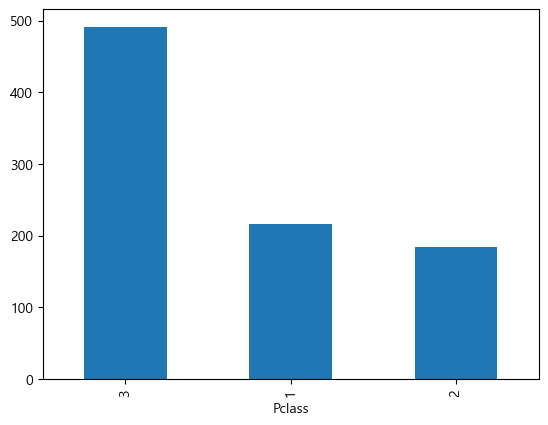

In [8]:
df["Pclass"].value_counts().plot(kind="bar", x="Pclass")
plt.show()

클래스 별로 가격을 비교하고 생존에 있어서 그 만큼의 가치가 있었는지 판단하여 보려고 한다.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df["Pclass"].value_counts() # 클래스 별로 몇명이 있는지 확인

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
sorted_pclass_3 = df[(df['Pclass'] == 3) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
sorted_pclass_3.drop(['Name', 'Ticket','Cabin'], axis = 1, inplace = True )
print(sorted_pclass_3.to_string(max_rows=10))
average_fare_pclass_3 = sorted_pclass_3['Fare'].mean()
print(f"3등급 승객들의 평균 요금 = {average_fare_pclass_3}")

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
379                 0       3    male  20.0      0      0   4.0125        C
327                 0       3    male  61.0      0      0   6.2375        S
844                 0       3    male  34.5      0      0   6.4375        C
819                 0       3    male  43.0      0      0   6.4500        S
372                 0       3    male  18.0      1      0   6.4958        S
...               ...     ...     ...   ...    ...    ...      ...      ...
864                 0       3  female   NaN      8      2  69.5500        S
793                 0       3  female   NaN      8      2  69.5500        S
181                 0       3  female   NaN      8      2  69.5500        S
325                 0       3    male   NaN      8      2  69.5500        S
160                 0       3    male   NaN      8      2  69.5500        S
3등급 승객들의 평균 

In [12]:
sorted_pclass_2 = df[(df['Pclass'] == 2) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
sorted_pclass_2.drop(['Name', 'Ticket','Cabin'], axis = 1, inplace = True)
print(sorted_pclass_2.to_string(max_rows=10))
average_fare_pclass_2 = sorted_pclass_2['Fare'].mean()
print(f"2등급 승객들의 평균 요금 = {average_fare_pclass_2}")

             Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
PassengerId                                                             
34                  0       2    male  66.0      0      0  10.5        S
85                  1       2  female  17.0      0      0  10.5        S
67                  1       2  female  29.0      0      0  10.5        S
57                  1       2  female  21.0      0      0  10.5        S
71                  0       2    male  32.0      0      0  10.5        S
...               ...     ...     ...   ...    ...    ...   ...      ...
386                 0       2    male  18.0      0      0  73.5        S
121                 0       2    male  21.0      2      0  73.5        S
73                  0       2    male  21.0      0      0  73.5        S
666                 0       2    male  32.0      2      0  73.5        S
656                 0       2    male  24.0      2      0  73.5        S
2등급 승객들의 평균 요금 = 21.358661235955054


In [13]:
sorted_pclass_1 = df[(df['Pclass'] == 1) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
sorted_pclass_1.drop(['Name', 'Ticket','Cabin'], axis = 1, inplace = True )
print(sorted_pclass_1.to_string(max_rows=10))
average_fare_pclass_1 = sorted_pclass_1['Fare'].mean()
print(f"1등급 승객들의 평균 요금 = {average_fare_pclass_1}")

             Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
PassengerId                                                                 
873                 0       1    male  33.0      0      0    5.0000        S
663                 0       1    male  47.0      0      0   25.5875        S
169                 0       1    male   NaN      0      0   25.9250        S
797                 1       1  female  49.0      0      0   25.9292        S
863                 1       1  female  48.0      0      0   25.9292        S
...               ...     ...     ...   ...    ...    ...       ...      ...
89                  1       1  female  23.0      3      2  263.0000        S
342                 1       1  female  24.0      3      2  263.0000        S
259                 1       1  female  35.0      0      0  512.3292        C
680                 1       1    male  36.0      0      1  512.3292        C
738                 1       1    male  35.0      0      0  512.3292        C

* 영화 타이타닉에서 등급별로 호화로운 차이가 많이 나서 각 등급별로 가격차이가 얼마나 나는지 궁금했다.

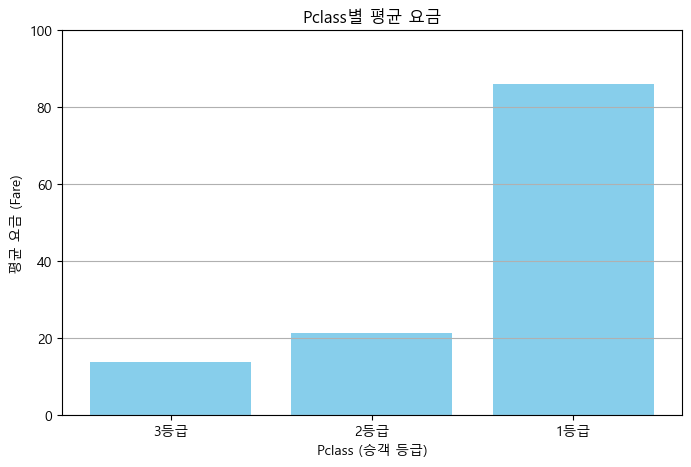

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

sorted_fares = [average_fare_pclass_3, average_fare_pclass_2, average_fare_pclass_1]
pclass_labels = ['3등급', '2등급', '1등급']

plt.figure(figsize=(8, 5))
plt.bar(pclass_labels, sorted_fares, color='skyblue')
plt.xlabel('Pclass (승객 등급)')
plt.ylabel('평균 요금 (Fare)')
plt.title('Pclass별 평균 요금')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

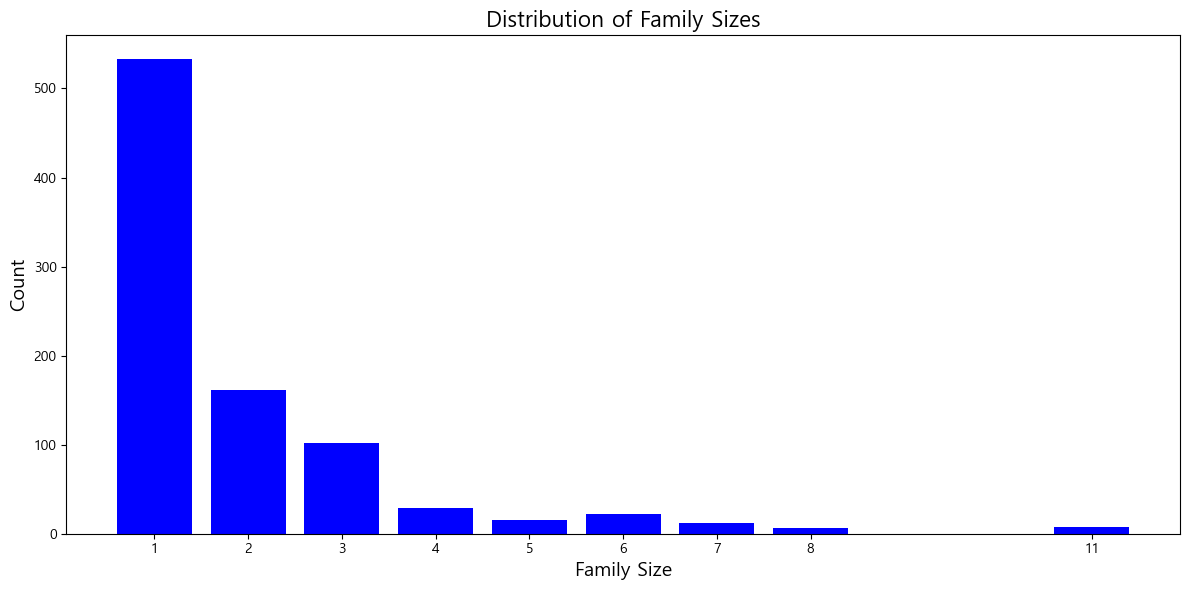

In [15]:
# 타이타닉 데이터셋 로드
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

titanic['family_size'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard'] + 1

# 가족 크기 분포 시각화 (seaborn 없이)
plt.figure(figsize=(12, 6))
family_size_count = titanic['family_size'].value_counts().sort_index()

plt.bar(family_size_count.index, family_size_count.values, color='blue')
plt.title('Distribution of Family Sizes', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(family_size_count.index)
plt.tight_layout()
plt.show()

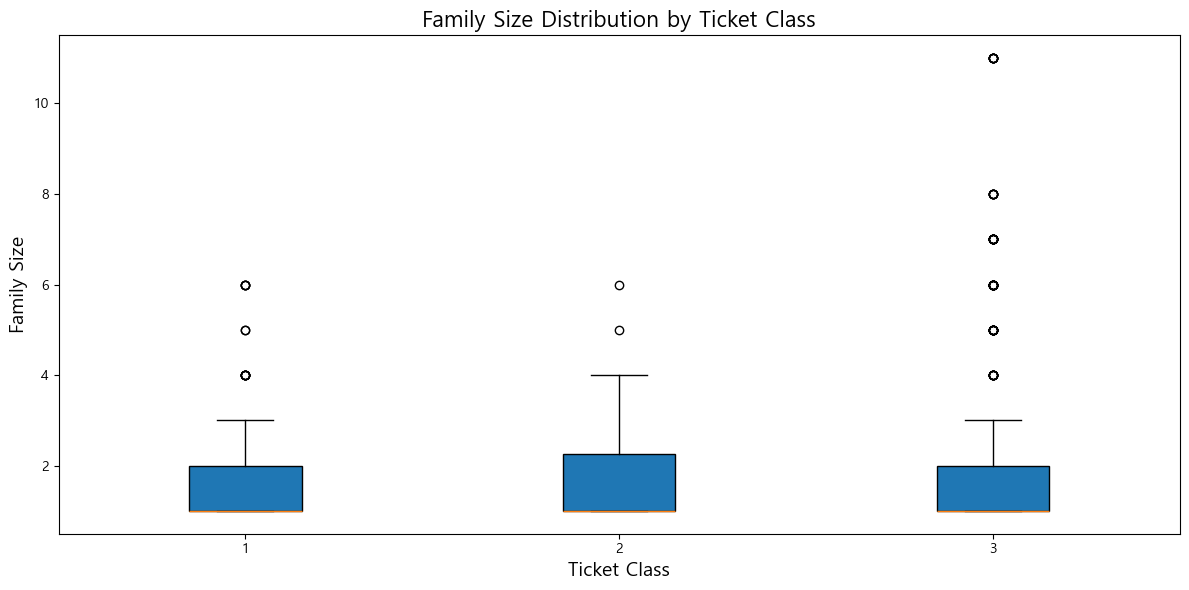

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 타이타닉 데이터셋 로드
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# 가족 크기 변수 생성 (sibsp + parch + 본인)
titanic['family_size'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard'] + 1

# 티켓 등급과 가족 크기 간의 관계 시각화 (Boxplot)
plt.figure(figsize=(12, 6))

# 각 등급별로 family_size 리스트 생성
pclass_1 = titanic[titanic['Pclass'] == 1]['family_size']
pclass_2 = titanic[titanic['Pclass'] == 2]['family_size']
pclass_3 = titanic[titanic['Pclass'] == 3]['family_size']

# Boxplot 그리기 (tick_labels 사용)
plt.boxplot([pclass_1, pclass_2, pclass_3], tick_labels=['1', '2', '3'], patch_artist=True)

# 그래프 제목과 축 레이블 설정
plt.title('Family Size Distribution by Ticket Class', fontsize=16)
plt.xlabel('Ticket Class', fontsize=14)
plt.ylabel('Family Size', fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 타이타닉 데이터셋 로드 (이미 전처리된 데이터 사용)
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# 가족 크기 변수 생성 (Siblings/Spouses Aboard + Parents/Children Aboard + 본인)
titanic['family_size'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard'] + 1

# 혼자 탑승한 승객 제외 (family_size가 1인 경우 제외)
titanic_with_family = titanic[titanic['family_size'] > 1]

# 결측치 처리 (나이의 결측치를 중앙값으로 대체)
titanic_with_family['Age'].fillna(titanic_with_family['Age'].median(), inplace=True)

# 독립 변수 (family_size, Age 사용)
X = titanic_with_family[['family_size', 'Age']]

# 종속 변수 (티켓 등급 Pclass)
y = titanic_with_family['Pclass']

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

# 성능 평가: 분류 리포트 출력
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.77      0.73        26
           2       1.00      0.00      0.00        12
           3       0.67      0.85      0.75        33

    accuracy                           0.68        71
   macro avg       0.79      0.54      0.49        71
weighted avg       0.73      0.68      0.61        71



C:\Users\rabbi\AppData\Local\Temp\ipykernel_19148\1011260730.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_with_family['Age'].fillna(titanic_with_family['Age'].median(), inplace=True)
C:\Users\rabbi\AppData\Local\Temp\ipykernel_19148\1011260730.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_with_family['Age'].filln